In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import os
%matplotlib inline

#Importing the data to train

train_data = pd.read_csv ("C:/Users/i.tomaselli.bonaiuto/Desktop/Data Science/Kaggle/Titanic project/Data/train.csv")
test_data = pd.read_csv("C:/Users/i.tomaselli.bonaiuto/Desktop/Data Science/Kaggle/Titanic project/Data/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#Data Exploration

#checking for missing data

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#checking types and understanding the info

train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
#EDA using a dtale GUI 

import dtale
dtale.show(train_data)

<function matplotlib.pyplot.show(close=None, block=None)>

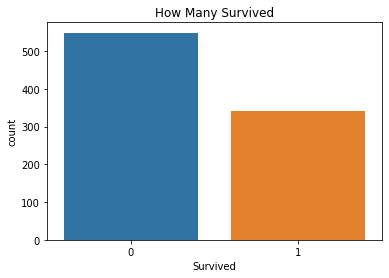

In [49]:
#How many survived in Train Data?
plt.title("How Many Survived")
sns.countplot(x="Survived", data=train_data)
plt.show

In [52]:
#Gender survivavility

train_data.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

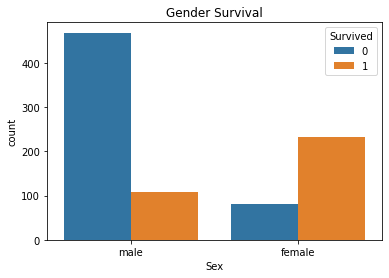

In [53]:
plt.title("Gender Survival")
sns.countplot(x="Sex", hue="Survived", data=train_data)
plt.show

#We can see that Females had better Survivavility, this is an important feature

C:\Users\i.tomaselli.bonaiuto\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



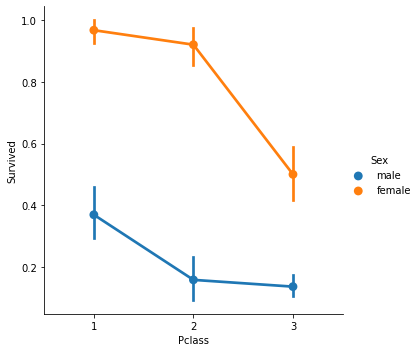

In [61]:
sns.factorplot("Pclass","Survived",hue="Sex", data=train_data)
plt.show()


#We can see that Females had better Survivavility, this is an important feature

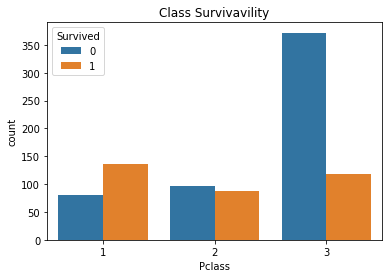

In [57]:
#Let's check Class Survivavility

plt.title("Class Survivavility")
sns.countplot(x="Pclass", hue="Survived", data=train_data)
plt.show()

#We can see that Class 1 & 2 had higher priority than class 3 passengers, this is an important feature

C:\Users\i.tomaselli.bonaiuto\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\i.tomaselli.bonaiuto\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\i.tomaselli.bonaiuto\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\i.tomaselli.bonaiuto\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



<AxesSubplot:xlabel='Age'>

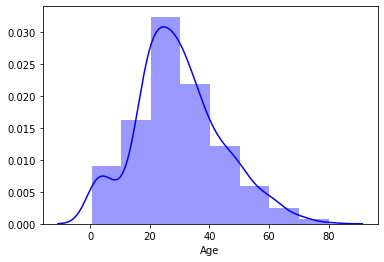

In [77]:
#Let's check age groups

sns.distplot(train_data["Age"], color="Blue", bins=8)

In [71]:
print("Youngest Passenger: ", train_data["Age"].min(), "Years")
print("Oldest Passenger: ", train_data["Age"].max(), "Years")
print("Mean(AVG) Age is: ", train_data["Age"].mean(), "Years")



Youngest Passenger:  0.42 Years
Oldest Passenger:  80.0 Years
Mean(AVG) Age is:  29.69911764705882 Years


Text(0.5, 1.0, 'Gender & Age survivavlity')

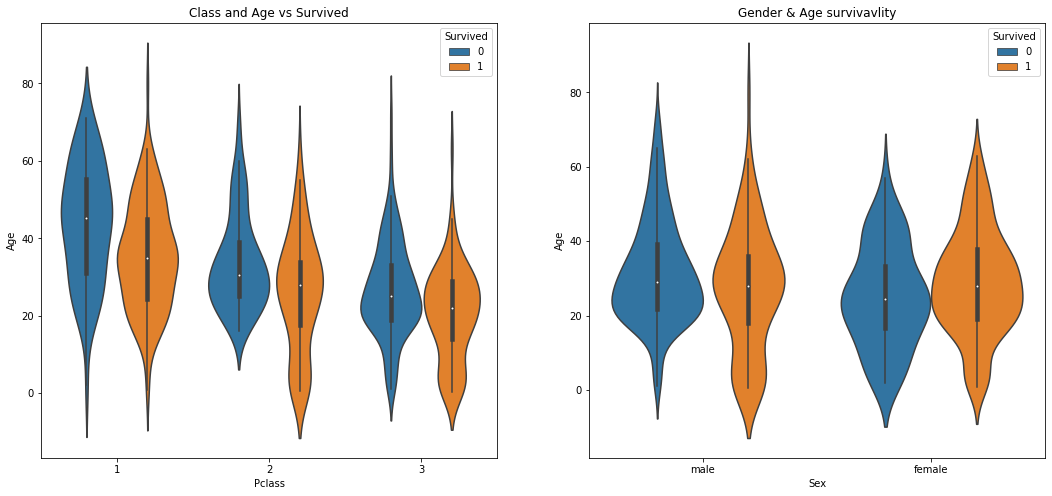

In [84]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data,ax=ax[0])
ax[0].set_title("Class and Age vs Survived")

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, ax=ax[1])
ax[1].set_title("Gender & Age survivavlity")


In [ ]:
# We see that most passengers were in their 20's and 30's (this goes in hand with our mean of 29 yo) 
# which also was the range with less survivors as we can see in the violing charts. 
# Womens & Kids regardles Class or age have the most survivors.
# Let's fix those 177 null values we saw in our data exploration, we will replace with the mean of each class to have a more accurate depiction of the dataset

In [88]:
# Get the mean age for each class
train_data.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [93]:
#Replacing null Age data with their mean values

train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==1),'Age']=38
train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==2), "Age"]=30
train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==3), "Age"]=25

#checking if there's any null in Age
train_data.Age.isnull().any()

False

In [97]:
#Cabin had 682 values missing, and it's a categorical value with irrelevant data so we can drop it, same with ticket
# since it's unlikely to yield usefull info

train_data=train_data.drop(['Cabin','Name','Ticket'],axis=1)
train_data.dropna(inplace=True)

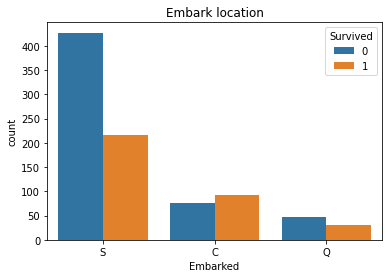

In [98]:
#Let's check Embark value
plt.title("Embark location")
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.show()

#most of the passwengers embarked in S location, we will fill those 2 null values in this column with that

In [100]:
train_data.loc[(train_data.Embarked.isnull()), "Embarked"]="S"

In [120]:
#Let's transform Embarked and Gender into a numerical values

embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
train_data=train_data.drop(['Embarked'],axis=1)


KeyError: 'Embarked'

In [139]:
train_data['gender']=0
train_data.loc[train_data['Sex']=="male",'gender']=0
train_data.loc[train_data['Sex']=="female",'gender']=1
train_data=train_data.drop(['gender'],axis=1)

In [140]:
#Let's transform the Age value (continuous) to a range balue for easy understanding (and make the ML model work better)

train_data['Age_band']=0
train_data.loc[train_data['Age']<=16,'Age_band']=0
train_data.loc[(train_data['Age']>16)&(train_data['Age']<=32),'Age_band']=1
train_data.loc[(train_data['Age']>32)&(train_data['Age']<=48),'Age_band']=2
train_data.loc[(train_data['Age']>48)&(train_data['Age']<=64),'Age_band']=3
train_data.loc[train_data['Age']>64,'Age_band']=4

train_data.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_band
886,887,0,2,0,27.0,0,0,13.00,1
887,888,1,1,1,19.0,0,0,30.00,1
888,889,0,3,1,25.0,1,2,23.45,1
889,890,1,1,0,26.0,0,0,30.00,1
890,891,0,3,0,32.0,0,0,7.75,1


In [138]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_band,gender
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.0
mean,446.000000,0.382452,2.311586,0.350956,29.218414,0.524184,0.382452,32.096681,1.321710,0.0
std,256.998173,0.486260,0.834700,0.477538,13.178017,1.103705,0.806761,49.697504,0.819244,0.0
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.0
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.0
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.0
75%,668.000000,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,31.000000,2.000000,0.0
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000,0.0


In [160]:
#RandomForestTree model with K-fold to avoid imbalanced predictions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as model
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(train_data.drop("Survived", axis=1), train_data["Survived"], random_state=100)
n_estimators=[100,200,300,400,500,600,700,800,900,1000]
model=RandomForestClassifier(n_estimators=100)
kfold=KFold(n_splits=15, random_state=13) #We will split the data into 15 different portions, using 14 to train and 1 to test 15 times
for val in n_estimators:
    cv=cross_val_score(RandomForestClassifier(n_estimators=val, X_train, y_train, cv=kfold, scoring="accuracy")


    print(f'Scores for each fold are: {cv}')
    print(f'Average score: {"{:.2f}".format(cv.mean())}')






SyntaxError: invalid syntax (<ipython-input-160-d73802c51968>, line 18)

In [147]:
output = pd.DataFrame({"PassengerID": test_data.PassengerId, "Survived": predictions})
output.to_csv("primerdraft.csv", index = False)
print("exportado correctamente")

exportado correctamente
